In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString,MultiLineString,Polygon
from descartes import PolygonPatch

In [2]:
l = {}
l[1] = LineString([[0.0,0.0],[1.0,1.0]])
l[2] = LineString([[0.0,0.5],[1.0,1.5]])
l[3] = LineString([[0.0,1.0],[1.0,2.0]])
l[4] = LineString([[0.0,1.5],[1.0,2.5]])

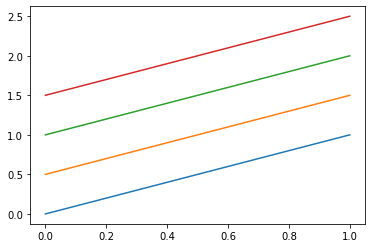

In [3]:
for i in range(1,5):
    x,y = l[i].coords.xy
    plt.plot(x,y)

In [4]:
lls = MultiLineString([l[1],l[2],l[3],l[4]])

In [5]:
p = lls.convex_hull

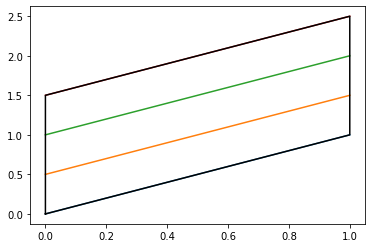

In [6]:
for i in range(1,5):
    x,y = l[i].coords.xy
    plt.plot(x,y)
x,y = p.exterior.coords.xy
plt.plot(x,y,'k',linewidth=1.5)

In [7]:
base_dir = os.path.expanduser('~')

#-- specify GL files
file_6d = os.path.join(base_dir,'GL_learning_data','6d_results','AllTracks_6d_GL.shp')
file_12d = os.path.join(base_dir,'GL_learning_data','12d_results','AllTracks_12d_GL.shp')
#-- specify error files
file_6d_err = os.path.join(base_dir,'GL_learning_data','6d_results','AllTracks_6d_uncertainty.shp')
file_12d_err = os.path.join(base_dir,'GL_learning_data','12d_results','AllTracks_12d_uncertainty.shp')

In [8]:
gdf = gpd.read_file(file_12d)

In [9]:
xz = 1022e3,1040e3
yz = 1856e3,1873e3

In [10]:
poly = Polygon([(xz[0],yz[0]),(xz[0],yz[1]),(xz[1],yz[1]),(xz[1],yz[0])])

(1856000.0, 1873000.0)

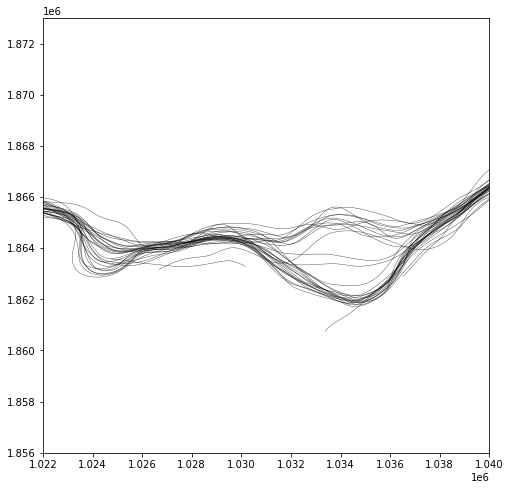

In [11]:
fig = plt.figure(1,figsize=(8,8))
lines = []
for i in range(len(gdf)):
    #-- extract geometry to see if it's in region of interest
    ll = gdf['geometry'][i]
    if ll.intersects(poly):
        lines.append(ll)
        xs,ys = ll.coords.xy
        plt.plot(xs,ys,linewidth=0.4,alpha=0.8,color='k',zorder=1)
plt.xlim(xz)
plt.ylim(yz)

In [12]:
mls = MultiLineString(lines)

In [13]:
errp = mls.buffer(1)

In [61]:
x,y = errp.exterior.coords.xy
err_poly = Polygon(zip(x,y))

(1856000.0, 1873000.0)

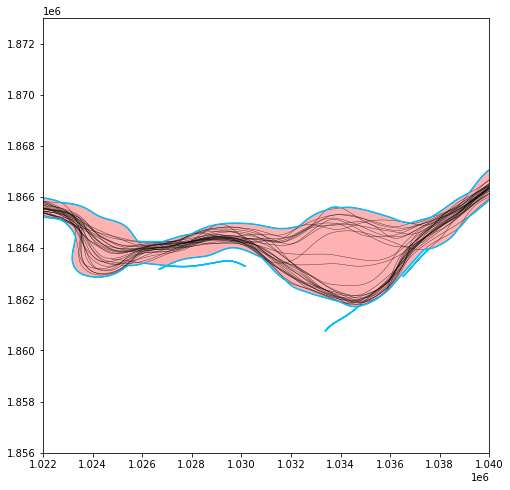

In [62]:
fig = plt.figure(1,figsize=(8,8))
ax = fig.add_subplot(111)
for il in lines:
    xs,ys = il.coords.xy
    ax.plot(xs,ys,linewidth=0.4,alpha=0.8,color='k',zorder=1)
x,y = errp.exterior.coords.xy
ax.plot(x,y,'deepskyblue',linewidth=1.5)
pp = PolygonPatch(err_poly,alpha=0.3,fc='red',ec='darkred')
ax.add_patch(pp)
ax.set_xlim(xz)
ax.set_ylim(yz)